# IV - Coronagraphy

First let's import HCIPy, and a few supporting libraries:

In [33]:
from hcipy import *
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Let's start with a vortex coronagraph. We have to construct a nice round pupil:

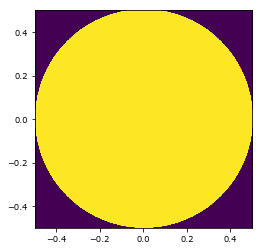

In [45]:
pupil_grid = make_pupil_grid(1024)
focal_grid = make_focal_grid(pupil_grid, 8, 32)
prop = FraunhoferPropagator(pupil_grid, focal_grid)

aperture = circular_aperture(1)
aperture = evaluate_supersampled(aperture, pupil_grid, 8)

imshow_field(aperture)
plt.show()

Now we can create the coronagraph:

In [51]:
coro = VortexCoronagraph(pupil_grid, charge=2, levels=8)

And propagate the light through it, onto the Lyot plane.

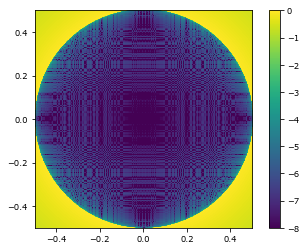

In [52]:
wf = Wavefront(aperture)
lyot = coro(wf)

imshow_field(np.log10(lyot.intensity), vmin=-8, vmax=0)
plt.colorbar()
plt.show()

Adding a Lyot stop that is slightly undersized:

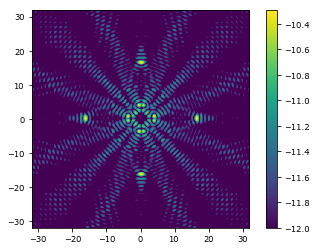

In [53]:
lyot_stop = Apodizer(circular_aperture(0.99)(pupil_grid))

img = prop(lyot_stop(lyot))
img_ref = prop(wf)

imshow_field(np.log10(img.intensity / img_ref.intensity.max()), vmin=-12)
plt.colorbar()
plt.show()